In [99]:
!pip freeze

absl-py==1.0.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/wo

In [26]:
!python --version

Python 3.8.8


In [143]:
# from google.colab import auth
# from googleapiclient.discovery import build

import io
# from googleapiclient.http import MediaIoBaseDownload

import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Graficos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

### Cargando data frame

In [108]:
# # auth
# auth.authenticate_user()
# drive_service = build('drive', 'v3')

In [95]:
# def download_file(file_id: str, filename:str, path: str = "sample_data"):
#   request = drive_service.files().get_media(fileId=file_id)
#   done = False
#   with open(f"{path}/{filename}", "wb") as fh:
#     downloader = MediaIoBaseDownload(fh, request)
#     while done is False:
#       _, done = downloader.next_chunk()


In [100]:
# dataset_file_id = "1kziSSReAgZDm7OKZaxISeVVUYr4Kb4R-"
# cambio el id cuando subio otro dataset
# dataset_file_id = "1DE8k1c_BCcQEfElE9vs8o6QgVj6CACIG"
# dataset_filename = "hotels_train.csv"
# download_file(dataset_file_id, dataset_filename)

# df = pd.read_csv(f"sample_data/{dataset_filename}")
path= "../data/hotels_train.csv"
df = pd.read_csv(path)

## **Vista General**
Copiamos el dataFrame para no realizar cambios en el original y damos una vista general a los datos.

In [190]:
df_hotel=df.copy()
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

## Vemos las primeras filas de datos

In [102]:
df_hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


### Valores nulos

Limpieza de datos, Veamos la cantidad de valores nulos que posee cada variable para considerar en sus analisis siguientes.

In [103]:
print(df_hotel.isna().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


In [104]:
def print_null_count(data: pd.DataFrame):
  null_series = data.isna().sum()
  type_count_df = pd.DataFrame({
    "Columnas": null_series.index,
    "valores_nulos": null_series.values,
    "porcentaje": null_series.values / data.shape[0],

  })
  type_count_df = type_count_df[type_count_df["valores_nulos"] > 0].sort_values("valores_nulos", ascending=False)
  px.bar(
    type_count_df,
    x="Columnas",
    y="porcentaje",
    hover_data={"valores_nulos": ":.0f", "porcentaje":":.2r"},
    title="Porcentaje de valores nulos por columna"
  ).show()

print_null_count(df_hotel)

podemos notar que existen 4 variables que poseen datos nulos, teniendo en cuenta que el dataframe contiene un total de 61913 datos
- children con 4 representa el 0,006% del dataframe
- country con 221 representa el 0,35% 
- agent con 7890 represnta el 12,7%
- company con 58761 representa el 94,9%

Se decide eliminar las filas (datos) que tiene tienen valores nulos en las columnas **country** y **children** dado que su porcentaje es infimo con respecto a la cantidad total de datos.(?? no se realizo la eliminacion)


Se analiza los valores no nulos de la columna **company** y no se encuentra informacion util por lo que se decide eliminar toda la columna dada la gran cantidad de valores nulos (95%) y no es de ayuda para obtener el target.

In [105]:
# print_categorical_value_count(df_hotel, "company", "is_canceled")

df_hotel = df_hotel[df_hotel.country.isna() | df_hotel.children.isna() == False].drop(columns="company")
transformed_df = df_hotel

### Variables Categoricas

Veamos como se comportan las variables categoricas con respecto a su estado de reserva. Teniendo en cuenta lo recien visto

In [113]:
def print_categorical_value_count(data: pd.DataFrame, column: str, subdivision: str):
  categorical_column_info = pd.merge(
    data.groupby(column)[subdivision].value_counts().reset_index(name="Cantidad"),
    data[column].value_counts().reset_index(name="total").rename(columns={"index": column}),
    on=column,
  ).sort_values(["total", subdivision], ascending=False)
  categorical_column_info["percentage"] = categorical_column_info["Cantidad"] / categorical_column_info["total"]
  categorical_column_info[subdivision] = categorical_column_info[subdivision].astype(str)
  
  px.bar(
    categorical_column_info,
    x=column,
    y="Cantidad",
    color=subdivision,
    hover_data={"percentage":":.2r"},
    title= "Distribución de varible " + column + " vs is_Canceled"
  ).show()

categorical_cols = [
  'hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment', # market_segment tiene info casi identica a distribution_channel
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status_date',
  # debatibles
  "agent", # marcado como categorica en el paper (agent id)
  "is_repeated_guest", # marcado como categorica en el paper (true false value)
  "arrival_date_day_of_month", # dia del mes (lo veo como una categoria de 31 valores posibles)
  'arrival_date_week_number', # week number (lo veo como una categoria de 53 valores posible)
  # "company", # marcado como categorica en el paper (company id) se borro del df
  
]
  # arrival_date_month + arrival_date_day_of_month me parece que tienen la misma info
  # arrival_date_week_number con diferente granularidad

for cat in categorical_cols:
  print_categorical_value_count(df_hotel, cat, "is_canceled")


### Variables numericas

Veamos si existen varibles negativas que no tengan sentido

In [148]:
num_cols = [
  'lead_time',
  'arrival_date_year',
  # 'arrival_date_week_number', # week number (lo veo como una categoria de 53 valores posible)
  # 'arrival_date_day_of_month', # dia del mes (lo veo como una categoria de 31 valores posibles)
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  # 'agent', # son ids por lo que la considero categorica
  # 'company', # son ids por lo que la considero categorica
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests'
]

for col in num_cols:
    values_list = df_hotel[df_hotel[col]<0][col]
    print("Cantindad de valores negativos de",col + ":" , values_list.size)

Cantindad de valores negativos de lead_time: 0
Cantindad de valores negativos de arrival_date_year: 0
Cantindad de valores negativos de stays_in_weekend_nights: 0
Cantindad de valores negativos de stays_in_week_nights: 0
Cantindad de valores negativos de adults: 0
Cantindad de valores negativos de children: 0
Cantindad de valores negativos de babies: 0
Cantindad de valores negativos de previous_cancellations: 0
Cantindad de valores negativos de previous_bookings_not_canceled: 0
Cantindad de valores negativos de booking_changes: 0
Cantindad de valores negativos de days_in_waiting_list: 0
Cantindad de valores negativos de adr: 1
Cantindad de valores negativos de required_car_parking_spaces: 0
Cantindad de valores negativos de total_of_special_requests: 0


No poseemos datos negativos, observemos como se comportan las variables numericas.

In [149]:
df_numeric = df_hotel[num_cols]
df_numeric.describe()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000,61688.000000
mean,112.510245,2016.155865,0.925399,2.511428,1.864350,0.105239,0.007181,0.114820,0.111561,0.195970,2.648603,102.533874,0.049459,0.523716
std,110.741959,0.708285,0.993214,1.885164,0.588537,0.403488,0.092325,0.995343,1.389375,0.610905,18.652334,47.708637,0.220017,0.775089
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


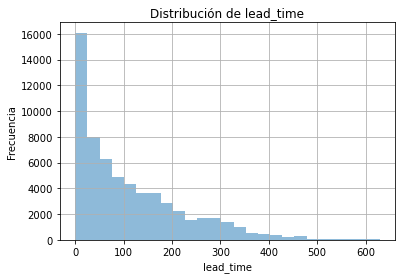

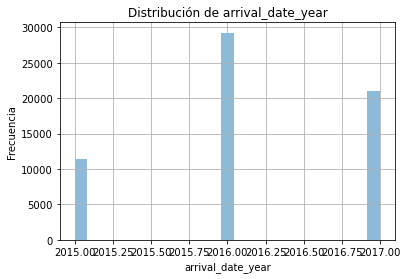

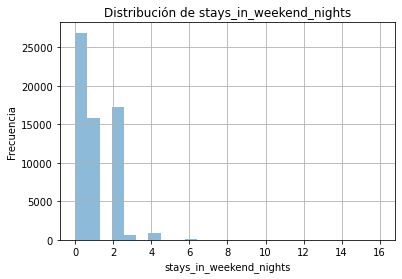

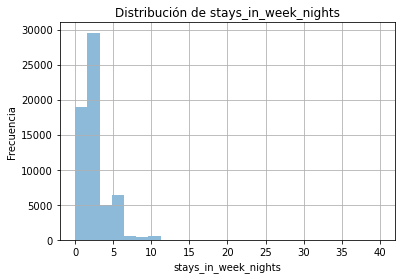

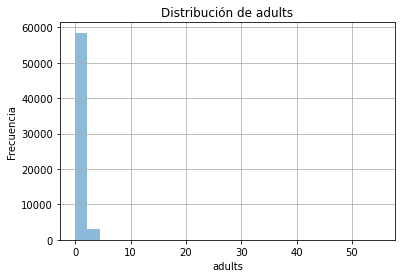

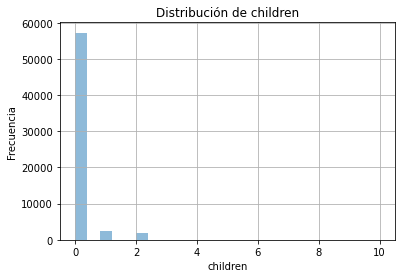

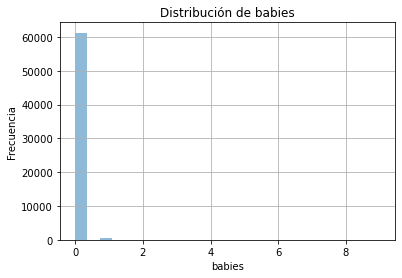

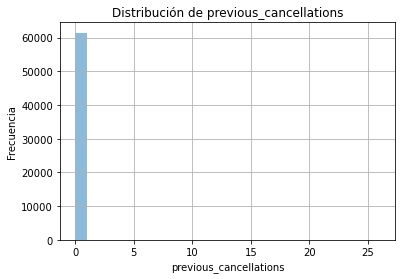

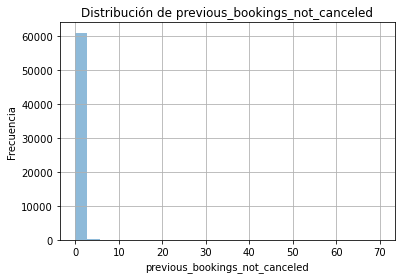

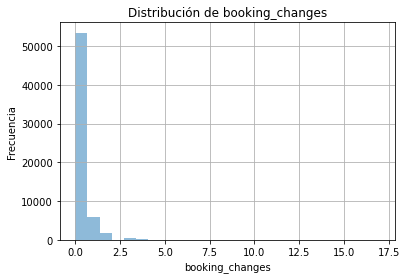

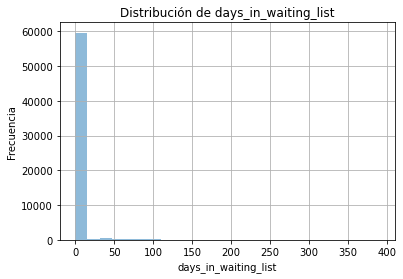

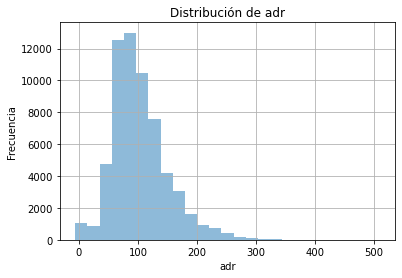

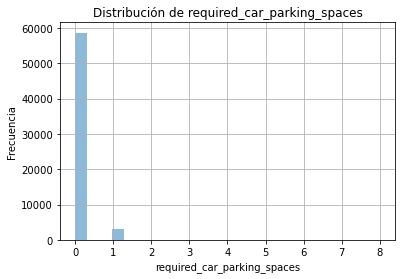

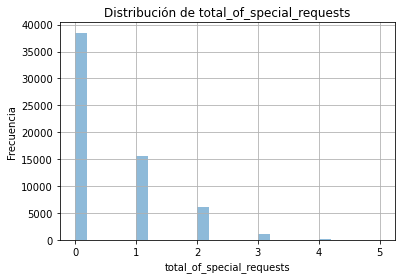

In [161]:
for column in num_cols:
  plt.title('Distribución de ' + column)
  plt.hist(df_hotel[column], bins = 25 , alpha = 0.5)
  plt.xlabel(column)
  plt.ylabel("Frecuencia")
  plt.grid(True)
  plt.show()
  # px.histogram(df_hotel, x=column, title = "Distribución de " + column ).show()
    # sns.histplot(data=df_hotel[column], alpha = 0.5).set(title="Distribución de " + column ,xlabel=column,ylabel="Frecuencia")
    # df_hotel[column].plot.box(title="Boxplot variable Age",xlabel=" ",ylabel=column)

## Martriz Correlacion
veamos si existe una posible correlacion entre las variables.

<AxesSubplot:>

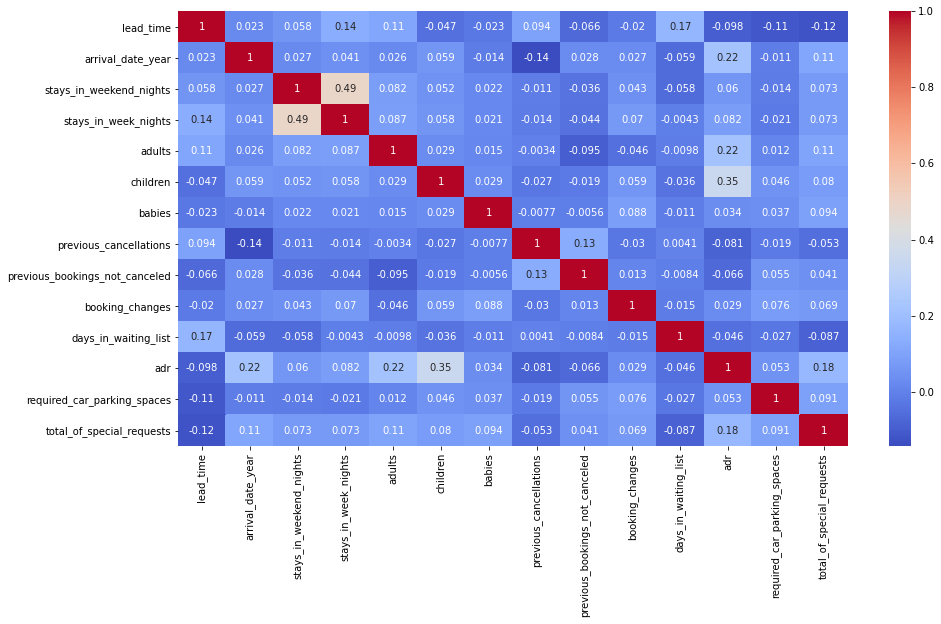

In [129]:
num_df = df_hotel.filter(items=num_cols)
num_dfCorr = num_df.corr()

#Grafico la matriz de correlación en un Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(num_dfCorr, annot = True, cmap='coolwarm')

Podemos observar una correlacion media alta entre las variables: 
- stays_in_week_nights vs stays_in_weekend_nights (0.49)
- previous_booking_not_canceled vs is_repeated_guest  (0.41)
- adr vs children (0.35)

Analicemos estas variables.

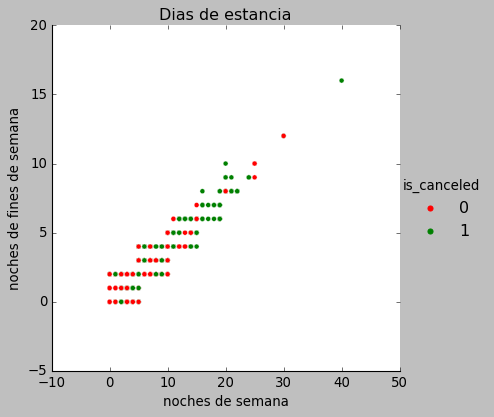

In [209]:
# Gráfico
sns.relplot(data=df_hotel,x="stays_in_week_nights", y="stays_in_weekend_nights", hue="is_canceled",
palette=["r", "g"]).set(title="Dias de estancia",xlabel='noches de semana',ylabel='noches de fines de semana')


[Text(0.5, 1.0, 'Distribucion de datos'),
 Text(0.5, 0, 'es huésped cotidiano'),
 Text(0, 0.5, 'reserva previa no cancelada')]

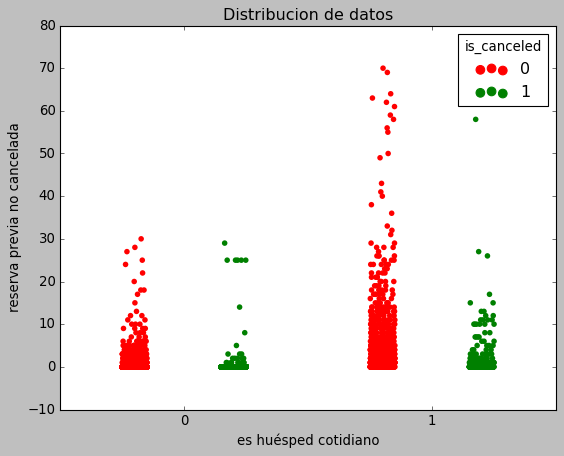

In [207]:
sns.stripplot(data = df_hotel, x = 'is_repeated_guest', y = 'previous_bookings_not_canceled', hue = 'is_canceled', dodge = True, 
palette=["r", "g"]).set(title="Distribucion de datos",xlabel='es huésped cotidiano',ylabel='reserva previa no cancelada')

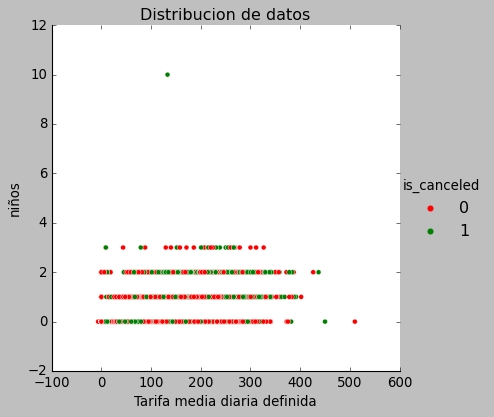

In [213]:
sns.relplot(data = df_hotel, x = 'adr', y = 'children', hue = 'is_canceled', 
palette=["r", "g"]).set(title="Distribucion de datos",xlabel='Tarifa media diaria definida',ylabel='niños')

## Datos Faltantes
Para los valores nulos de la columna **agent** se eligio utilizar K-Nearest Neighbors para asignarles el valor mas probable.
Como se puede ver la cantidad de ids se mantuvo (no tendria sentido que se inventen nuevos ids)
Y los valores se mantienen en la misma proporcion que antes del cambio


In [130]:
def fill_null_with_knn(data: pd.DataFrame, column: str):
  num_cols = [
    'lead_time',
    'arrival_date_year',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
  ]
  num_df = data.filter(num_cols)
  # se normaliza las columnas numericas para evitar que los valores mas grandes tengan mayor peso
  num_normalized_df = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns=num_df.columns)
  # se agregaron algunas columnas categoricas utlizando one hot encoding
  hot_encoded_cols = pd.get_dummies(data[["hotel", "meal", "deposit_type", "customer_type"]], drop_first=True)
  knn_df = pd.concat([
      num_normalized_df,
      hot_encoded_cols,
      data[column]
    ],
    axis=1
  )
  # TODO: Mejorable utilizar una implementacion que permita el uso de mas neighbors con moda
  imputer = KNNImputer(n_neighbors=1)
  transformed_df[column] = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)[column]

print(f"Cantidad de ids unicos en la columna agent antes de la transformacion: {transformed_df.agent.nunique()}")
print_categorical_value_count(transformed_df, "agent", "is_canceled")

fill_null_with_knn(transformed_df, "agent")

print(f"Cantidad de ids unicos en la columna agent despues de la transformacion: {transformed_df.agent.nunique()}")
print_categorical_value_count(transformed_df, "agent", "is_canceled")

Cantidad de ids unicos en la columna agent antes de la transformacion: 296


Cantidad de ids unicos en la columna agent despues de la transformacion: 296
